In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_50411_Z')

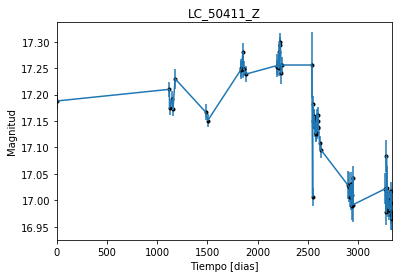

In [2]:
data = np.genfromtxt('LC_50411_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_50411_Z')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

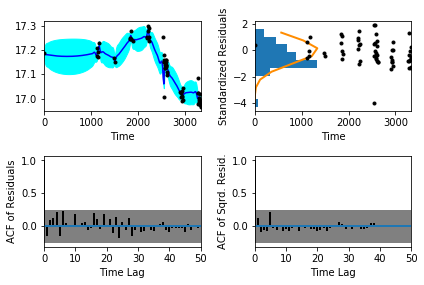

In [5]:
sample.assess_fit()

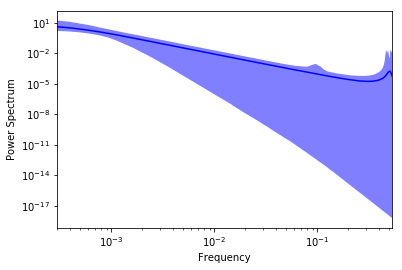

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_50411_Z')

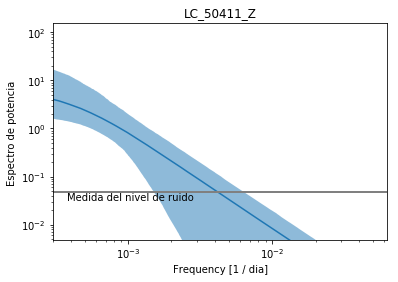

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_50411_Z')

Text(0.5,1,'Prediccion , valor esperado LC_50411_Z')

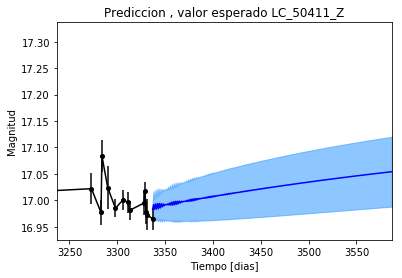

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_50411_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_50411_Z')

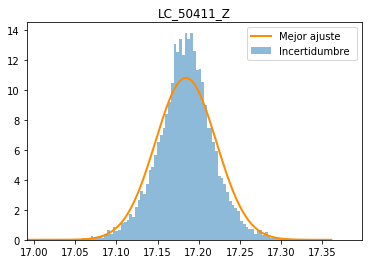

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_50411_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_Z')

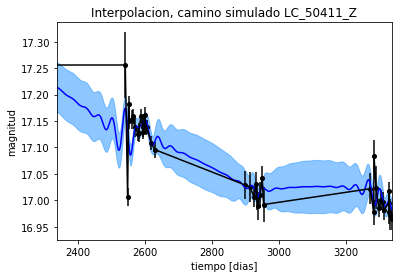

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_50411_Z')

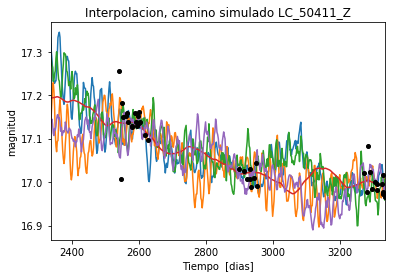

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_50411_Z')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 240.555129149
Median: 0.0028854971333
Standard deviation: 0.100385003115
68% credibility interval: [ 0.00119023  0.01056985]
95% credibility interval: [ 0.00035775  0.33552914]
99% credibility interval: [  3.07831136e-04   7.35337433e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1751.96198081
Median: 0.00236791996811
Standard deviation: 0.0221446995187
68% credibility interval: [ 0.00074894  0.00540654]
95% credibility interval: [ 0.00032107  0.01928344]
99% credibility interval: [ 0.00030276  0.11659066]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 180.83604349
Median: 0.510863534396
Standard deviation: 0.334603367

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 56.6097633234
Median: 145.332053433
Standard deviation: 4.05994820741
68% credibility interval: [ 138.51745982  147.51136339]
95% credibility interval: [ 135.58905821  148.934924  ]
99% credibility interval: [ 133.16670502  149.73517785]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 313.175615239
Median: 3.38035354332
Standard deviation: 2.03325174016
68% credibility interval: [ 0.64670516  5.60635645]
95% credibility interval: [ 0.02065222  6.60752098]
99% credibility interval: [ 0.00930957  6.75101267]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 93.1292793306
Median: 9.50353635061
Standard deviation: 5.15026849158
68% credibility interval: [  0.18077982  11.29014918]
95% credibility interval: [  1.56436158e-0

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20038.342607
Median: 1.70668449661e-30
Standard deviation: 5.70077407734e+74
68% credibility interval: [  1.11008187e-67   2.69763001e-01]
95% credibility interval: [  6.27523634e-88   2.59563224e+01]
99% credibility interval: [  1.42058344e-89   3.22604604e+22]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1525.80736353
Median: 17.1448180176
Standard deviation: 0.0468156848783
68% credibility interval: [ 17.1055183   17.18659306]
95% credibility interval: [ 17.05433276  17.2317348 ]
99% credibility interval: [ 17.00648672  17.27557455]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 61.0824036324
Median: 0.485903112128
Standard deviation: 0.220354720359
68% credibility interval: [  4.49183296e-04   5.31062140e-01]
95% credibility interval: [ 0.          0.54143071]
99% credibility interval: [ 0.          0.86320878]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 61.0824036324
Median: 0.485903112128
Standard deviation: 0.220354720359
68% credibility interval: [  4.49183296e-04   5.31062140e-01]
95% credibility interval: [ 0.          0.54143071]
99% credibility interval: [ 0.          0.86320878]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 648.716772768
Median: 0.0
Standard deviation: 8.0026

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 56.6097633234
Median: 145.332053433
Standard deviation: 4.05994820741
68% credibility interval: [ 138.51745982  147.51136339]
95% credibility interval: [ 135.58905821  148.934924  ]
99% credibility interval: [ 133.16670502  149.73517785]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 411.4749565
Median: 0.00810920000042
Standard deviation: 0.0080005616299
68% credibility interval: [ 0.00551133  0.01247839]
95% credibility interval: [ 0.0039431   0.02616254]
99% credibility interval: [ 0.00326977  0.05012119]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 68.4040728376
Median: 1.1262447864
Standard deviation: 0.351735084456
68% credibility interval: [ 0.8884241  1.6872803]
95% credibility interval: [ 0.75081532  1.94591456]
99% credibility interval: [ 0.67300344  1.98861554]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 144.52985233
Median: 0.180506803005
Standard deviation: 0.147912507808
68% credibility interval: [  9.20737960e-06   3.37109460e-01]
95% credibility interval: [  6.01773519e-09   4.64746322e-01]
99% credibility interval: [  3.18412078e-28   5.40270852e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 240.555129149
Median: (-0.0181301131919-1.77307103162j)
Standard deviation: 1.52143088617
68% credibility interval: [-0.06641231-3.3392623j  -0.00747842-3.04333421j]
95% credibility interval: [-2.10819179+0.j         -0.00224778-0.00261449j]
99% credibility interval: [ -4.62026136e+00+0.j          -1.93416007e-03-0.00207805j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1751.96198081
Median: (-0.0148780799522+3.02928849989j)
Standard deviation: 1.39150342503
68% credibility interval: [-0.03397026+3.02062439j -0.00470572+2.87186744j]
95% credibility interval: [-0.12116141+3.41269085j -0.00201732+4.59221743j]
99% credibility interval: [-0.73256075 +6.33727680e-01j -0.00190230 +3.36788480e-06j]
Posterior summary for pa